In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import webbrowser
import folium
import googlemaps
import mysql.connector

/tmp/ipykernel_19770/495930524.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 1. 스마트팜 검색어 분석
##### 2021.12 ~ 2024.03

In [3]:
chae = mysql.connector.connect(     
         host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",     
          port = 3306,     
          user = "chae",     
          password = "0754",     
          database = "AutoFarming" 
)

# 테이블 불러오기
chae_cursor = chae.cursor()
chae_cursor.execute('select * from SmartFarm_Trend')

# 쿼리 결과를 데이터프레임으로 변환
Timeline = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
Timeline.info()
chae.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           28 non-null     object 
 1   Num_of_search  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


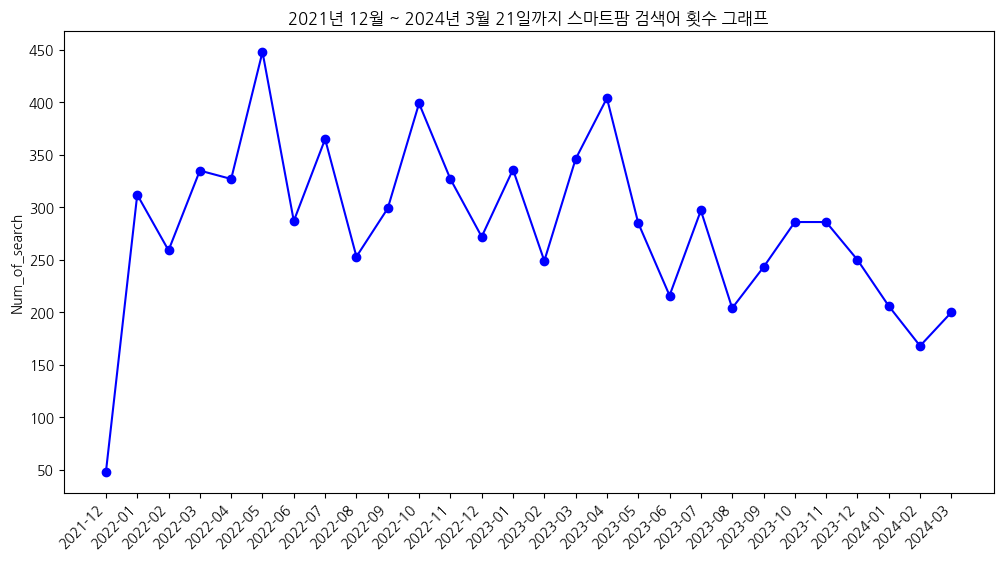

In [47]:
#그래프 정보 설정
plt.figure(figsize=(12, 6))

#그래프생성
plt.plot(Timeline['date'], Timeline['Num_of_search'], color='blue', linestyle='-', marker='o')

plt.xlabel('') #x 라벨
plt.ylabel('Num_of_search') #y 라벨
plt.xticks(rotation=45, ha='right')
plt.title("2021년 12월 ~ 2024년 3월 21일까지 스마트팜 검색어 횟수 그래프") #그래프 이름

#그래프 출력
plt.show()

In [48]:
top10_Timeline = Timeline.sort_values(by='Num_of_search', ascending=False).head(10)
top10_Timeline

,date,Num_of_search
5,2022-05,448.0
16,2023-04,404.0
10,2022-10,399.0
7,2022-07,365.0
15,2023-03,346.0
13,2023-01,336.0
3,2022-03,335.0
11,2022-11,327.0
4,2022-04,327.0
1,2022-01,312.0


#### 2. 냉동과일 vs 국산과일 검색어 분석
##### 2019~2024년

In [67]:
chae = mysql.connector.connect(     
         host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",     
          port = 3306,     
          user = "chae",     
          password = "0754",     
          database = "AutoFarming" 
)

# 테이블 불러오기
chae_cursor = chae.cursor()
chae_cursor.execute('select * from Raw_vs_Frozen_Trend')

# 쿼리 결과를 데이터프레임으로 변환
Raw_vs_Frozen_Trend = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
Raw_vs_Frozen_Trend.info()

chae.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    61 non-null     object 
 1   raw     61 non-null     float64
 2   frozen  61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [64]:
Raw_vs_Frozen_Trend[Raw_vs_Frozen_Trend['frozen'] < Raw_vs_Frozen_Trend['raw']].sort_values(by='raw', ascending=False)

,date,raw,frozen
14,2020-05,135,0
38,2022-05,131,41
52,2023-07,109,0
13,2020-04,109,0
25,2021-04,100,0
4,2019-07,85,0
5,2019-08,68,0
1,2019-04,64,0
16,2020-07,64,0
53,2023-08,59,0


In [65]:
Raw_vs_Frozen_Trend[Raw_vs_Frozen_Trend['frozen'] > Raw_vs_Frozen_Trend['raw']].sort_values(by='raw', ascending=False)

,date,raw,frozen
21,2020-12,51,59
40,2022-07,48,69
10,2020-01,0,50
29,2021-08,0,42


In [174]:
Raw_vs_Frozen_Trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    61 non-null     object
 1   raw     61 non-null     int64 
 2   frozen  61 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


#### 3. '사과' vs '물가' 검색어 트랜드 분석

In [83]:
chae = mysql.connector.connect(     
         host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",     
          port = 3306,     
          user = "chae",     
          password = "0754",     
          database = "AutoFarming" 
)

# 테이블 불러오기
chae_cursor = chae.cursor()
chae_cursor.execute('select * from Apple_vs_CPI_search_num')

# 쿼리 결과를 데이터프레임으로 변환
Apple_vs_CPI_search_num = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
Apple_vs_CPI_search_num.info()

chae.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13 non-null     object 
 1   apple   13 non-null     float64
 2   cpi     13 non-null     float64
dtypes: float64(2), object(1)
memory usage: 440.0+ bytes


In [ ]:
chae = mysql.connector.connect(     
         host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",     
          port = 3306,     
          user = "chae",     
          password = "0754",     
          database = "AutoFarming" 
)

# 테이블 불러오기
chae_cursor = chae.cursor()
chae_cursor.execute('select * from Apple_vs_CPI_search_num')

# 쿼리 결과를 데이터프레임으로 변환
Apple_vs_CPI_search_num = pd.DataFrame(chae_cursor.fetchall(), columns=chae_cursor.column_names)
Apple_vs_CPI_search_num.info()

chae.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13 non-null     object 
 1   apple   13 non-null     float64
 2   cpi     13 non-null     float64
dtypes: float64(2), object(1)
memory usage: 440.0+ bytes


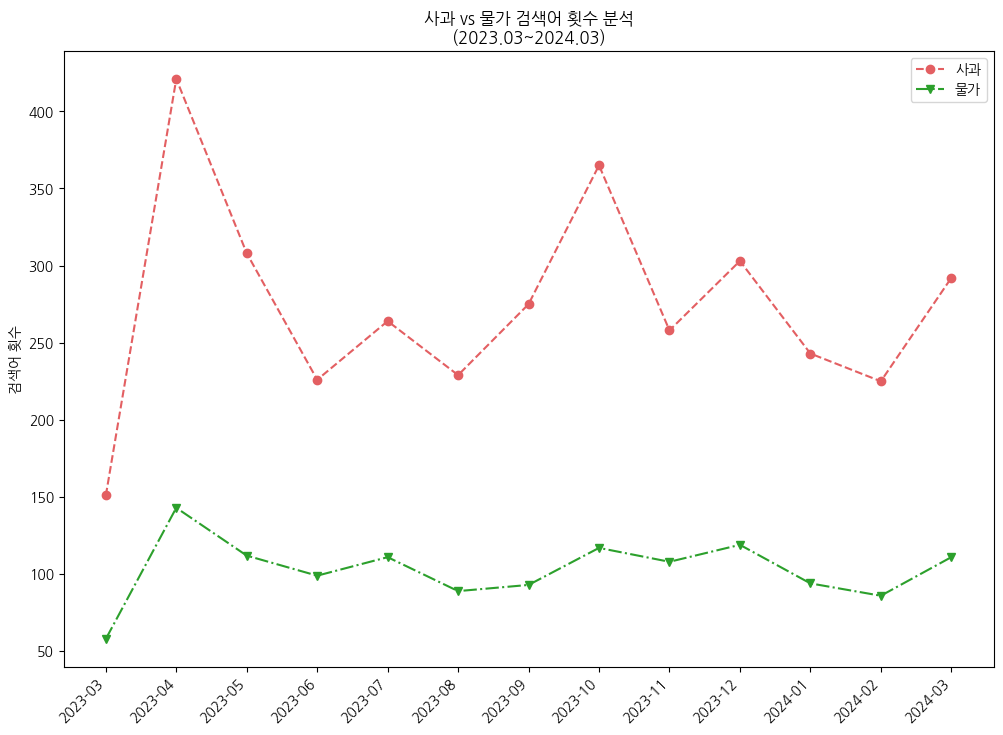

In [84]:
# 그래프의 사이즈 설정
plt.figure(figsize=(12, 8))

plt.plot(Apple_vs_CPI_search_num['date'], Apple_vs_CPI_search_num['apple'], color='#e35f62',
         marker='o', linestyle='--', label = '사과')

plt.plot(Apple_vs_CPI_search_num['date'], Apple_vs_CPI_search_num['cpi'], color='#2ca02c',
         marker='v', linestyle='-.', label = '물가')

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
# x축 간격을 1로 설정
plt.xticks(Apple_vs_CPI_search_num['date'])

# 제목과 축 이름 설정
plt.title('사과 vs 물가 검색어 횟수 분석\n(2023.03~2024.03)')
plt.xlabel('')
plt.ylabel('검색어 횟수')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()